## Проект по теме «Системы одновременных уравнений».


### Данные

В качестве эндогенных переменных представлены цены закрытия акций ПАО "Лукойл", ПАО "Роснефть" и USD/RUB (руб.) по дням с 03.01.2023 по 31.05.2024. Источник: investing.com

### Спецификация

$\begin{cases} LKOH_t = a_1 t + a_2 RNFT_t + u_t \\ RNFT_t = b_1 USD_t + b_2 LKOH_t + v_t \end{cases} $


### Обоснование

Акции лукойла зависят от уровня временного ряда (t – число дней с момента начала наблюдений), а также акций Роснефти, так как обе компании являются одиними из крупнейших представителей нефтегазового сектора, ведут примерно одинаковую деятельность (похожая структура выручки и прибыли), сопоставимы по размеру и подвержены одинаковым внешним (макроэкономическим факторам). В свою очередь акции Роснефти (а, соответственно, и Лукойла) зависят от пары USD/RUB, так как обе компании являются экспортерами и существенная доля их выручки представлена в иностранной валюте, а издержки внутри страны обеспечиваются в рублях. Таким образом, курс конвертации долларов в рубли влияет на финансовые показатели и, соответственно, стоимость акций нефтегазовых компаний-экспортеров.

### Задание

Спецификация модели должна быть обоснована.

1) Для выбранной спецификации необходимо записать приведенную форму.

2) Оценить по правилам порядка и ранга на сколько модель идентифицируема.

3) Оценить модель с помощью МНК (каждое уравнение), КМНК (если имеет место), ДМНК, 3МНК.

4) Дать интерпретацию и сравнить результаты модели.

5) Показать качество прогнозов каждой модели для тестовой выборки.

6) Дать экономическую трактовку результатов.

7) Дать рекомендации по применимости модели.

### 0. Подготовка данных, предварительный анализ

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import warnings
warnings.filterwarnings("ignore")

In [4]:
lkoh = pd.read_csv('./lukoil.csv')
lkoh = lkoh.iloc[::-1]
lkoh.reset_index(drop=True, inplace=True)
lkoh['Цена'] = lkoh['Цена'].str.replace('.', '').str.replace(',', '.').astype('float')
lkoh

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,03.01.2023,4123.5,"4.082,0","4.139,0","4.075,5","321,49K","1,33%"
1,04.01.2023,4116.0,"4.124,0","4.165,5","4.090,0","405,82K","-0,18%"
2,05.01.2023,4087.0,"4.121,5","4.127,0","4.081,5","176,21K","-0,70%"
3,06.01.2023,4089.0,"4.088,0","4.118,0","4.085,0","239,86K","0,05%"
4,09.01.2023,4110.0,"4.105,0","4.123,0","4.093,0","356,31K","0,51%"
...,...,...,...,...,...,...,...
354,27.05.2024,7541.5,"7.719,5","7.750,0","7.492,5","1,14M","-2,31%"
355,28.05.2024,7590.0,"7.553,0","7.700,0","7.447,0","870,71K","0,64%"
356,29.05.2024,7684.0,"7.600,0","7.689,0","7.582,5","402,55K","1,24%"
357,30.05.2024,7567.0,"7.698,0","7.722,5","7.554,5","538,41K","-1,52%"


In [5]:
rnft = pd.read_csv('./rosneft.csv')
rnft = rnft.iloc[::-1]
rnft.reset_index(drop=True, inplace=True)
rnft['Цена'] = rnft['Цена'].str.replace('.', '').str.replace(',', '.').astype('float')

rnft

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,03.01.2023,368.05,"367,95","372,75","366,20","2,64M","0,73%"
1,04.01.2023,365.80,"366,50","367,60","363,25","1,81M","-0,61%"
2,05.01.2023,367.50,"367,20","369,00","365,80","1,33M","0,46%"
3,06.01.2023,367.30,"368,00","368,50","366,75","938,44K","-0,05%"
4,09.01.2023,367.95,"368,20","369,70","366,05","4,35M","0,18%"
...,...,...,...,...,...,...,...
354,27.05.2024,578.25,"585,00","587,90","568,45","7,41M","-1,17%"
355,28.05.2024,573.00,"578,80","584,85","568,50","4,39M","-0,91%"
356,29.05.2024,575.65,"573,95","579,95","571,00","2,62M","0,46%"
357,30.05.2024,566.40,"577,65","581,15","556,10","5,59M","-1,61%"


In [6]:
usd = pd.read_csv('./usd.csv')
usd = usd.iloc[::-1]
usd.reset_index(drop=True, inplace=True)
usd['Цена'] = usd['Цена'].str.replace('.', '').str.replace(',', '.').astype('float')

usd

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,03.01.2023,71.1375,"69,9000","71,4645","69,7025",NaN,"1,77%"
1,04.01.2023,72.0000,"71,1375","72,1262","71,0284",NaN,"1,21%"
2,05.01.2023,72.1800,"72,0000","72,2401","71,0625",NaN,"0,25%"
3,06.01.2023,72.1225,"72,1800","72,4513","71,5293",NaN,"-0,08%"
4,09.01.2023,69.9900,"72,1225","72,2475","69,3477",NaN,"-2,96%"
...,...,...,...,...,...,...,...
354,27.05.2024,88.6200,"89,5250","89,6284","88,3335",NaN,"-1,01%"
355,28.05.2024,88.5750,"88,6200","88,7109","88,2636",NaN,"-0,05%"
356,29.05.2024,89.5125,"88,5750","89,7445","88,5725",NaN,"1,06%"
357,30.05.2024,89.8525,"89,5125","90,0048","89,5125",NaN,"0,38%"


In [7]:
df = pd.DataFrame({
    't': np.arange(1, len(lkoh)+1),
    'lkoh': lkoh.iloc[:, 1],
    'rnft': rnft.iloc[:, 1],
    'usd': usd.iloc[:, 1],
})

df

,t,lkoh,rnft,usd
0,1,4123.5,368.05,71.1375
1,2,4116.0,365.80,72.0000
2,3,4087.0,367.50,72.1800
3,4,4089.0,367.30,72.1225
4,5,4110.0,367.95,69.9900
...,...,...,...,...
354,355,7541.5,578.25,88.6200
355,356,7590.0,573.00,88.5750
356,357,7684.0,575.65,89.5125
357,358,7567.0,566.40,89.8525


<AxesSubplot:xlabel='t', ylabel='usd'>

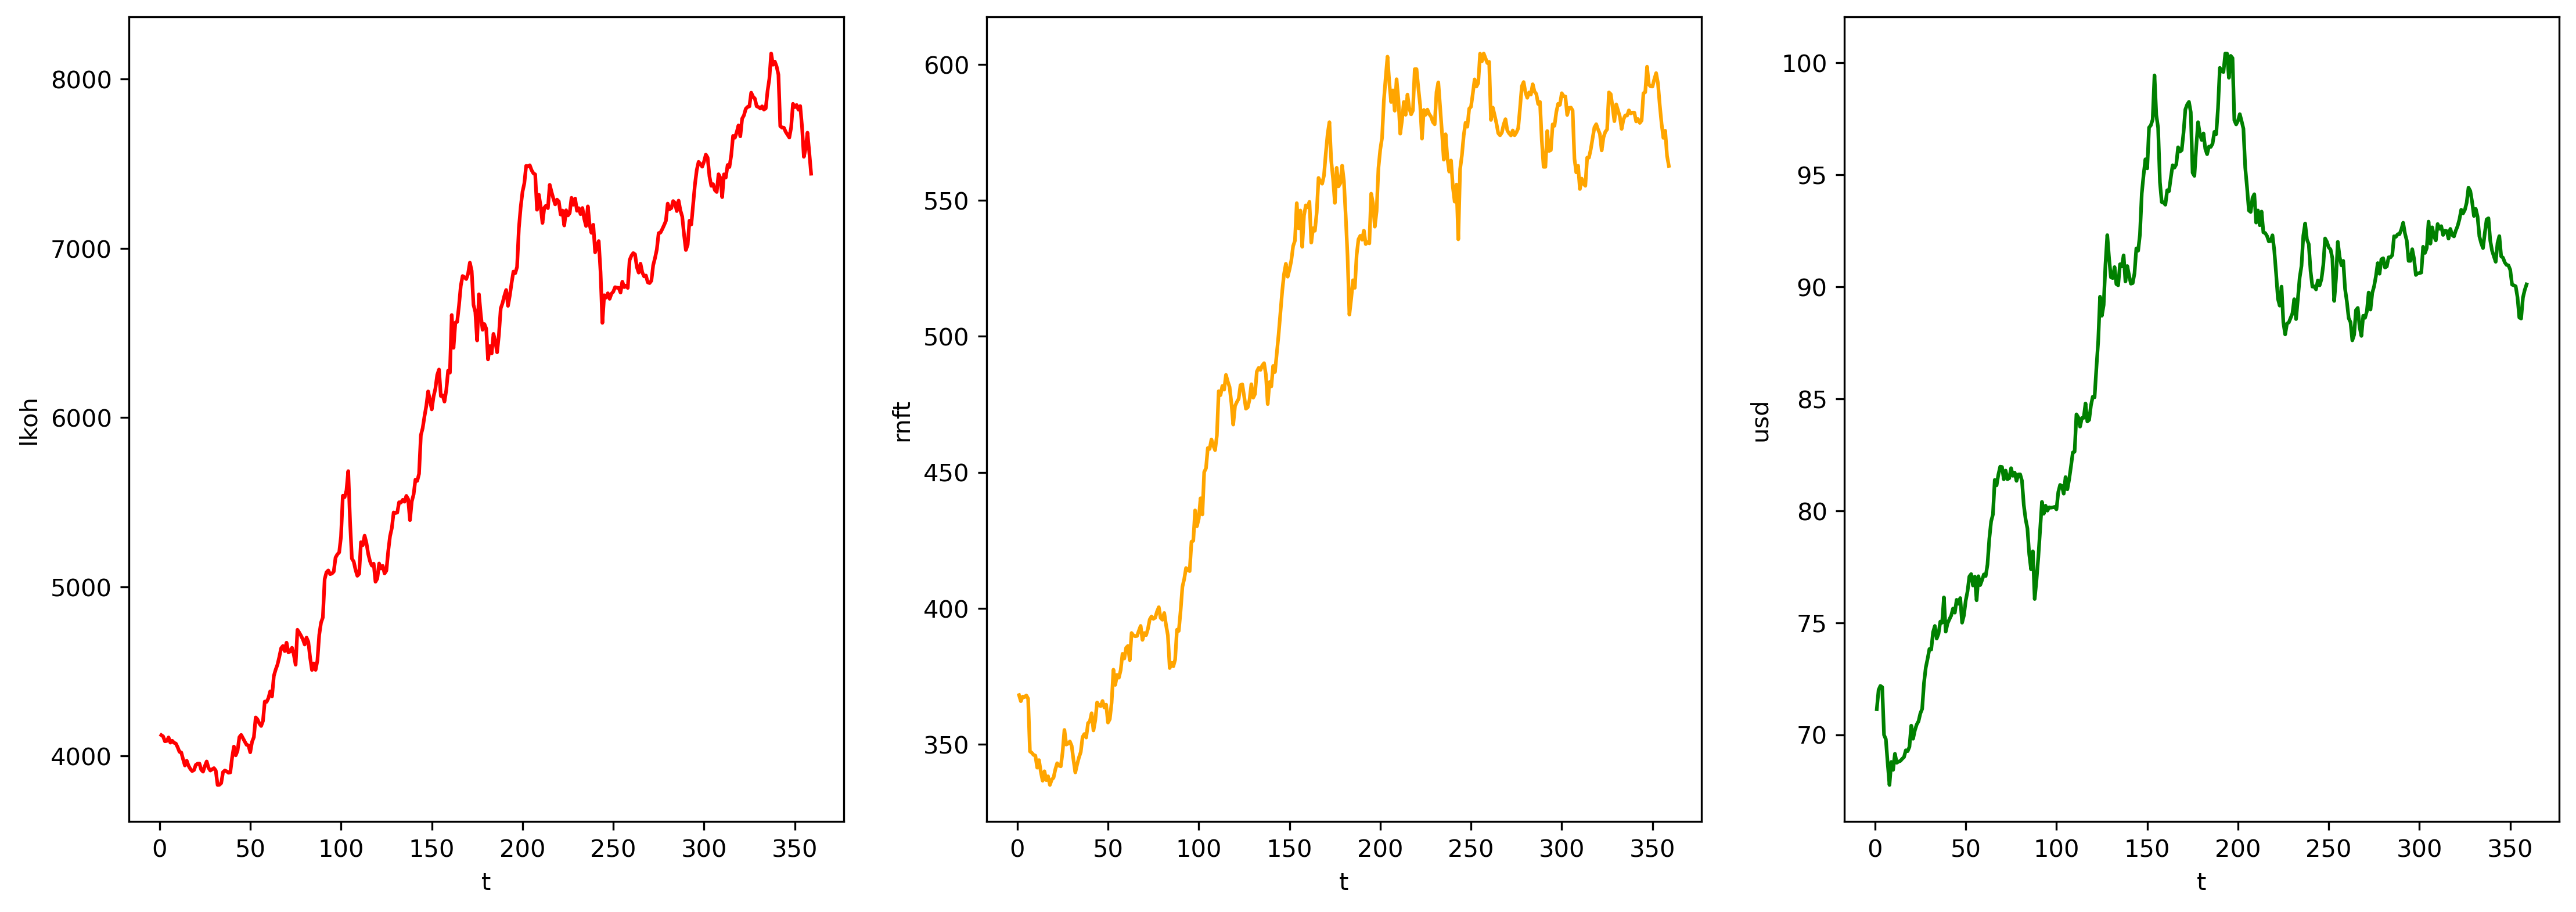

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), dpi=300)

sns.lineplot(x='t', y='lkoh', data=df, ax=axs[0], color='r')
sns.lineplot(x='t', y='rnft', data=df, ax=axs[1], color='orange')
sns.lineplot(x='t', y='usd', data=df, ax=axs[2], color='green')

<AxesSubplot:>

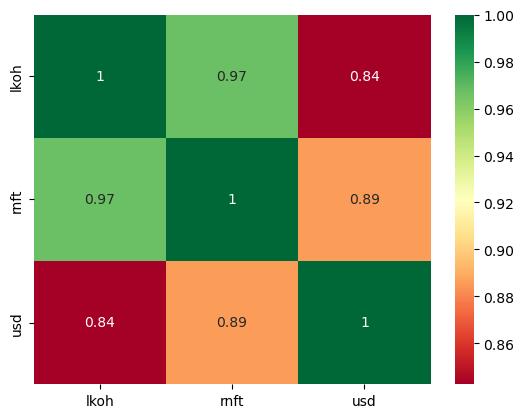

In [9]:
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap="RdYlGn")

### 1. Составление структурной и приведенной формы

#### 1.1 Структурная форма

$A = \begin{pmatrix} 1 & -a_2 \\ -b_2 & 1  \end{pmatrix}$

$B= \begin{pmatrix} -a_1 & 0 \\ 0 & -b_1  \end{pmatrix}$

$A \cdot Y_t + B \cdot X_t = V_t$

#### 1.2 Приведенная форма

$M = \begin{pmatrix} \frac{a_1}{-a_2 b_2 + 1} & \frac{a_2 b_1}{-a_2 b_2 + 1} \\ \frac{a_1 b_2}{-a_2 b_2 + 1} & \frac{b_1}{-a_2 b_2 + 1}  \end{pmatrix}$

В реузльтате приведенная форма выглядит следующим образом:

$\begin{cases} LKOH_t = m_{11} t + m_{12} USD_t + u_t \\ RNFT_t = m_{21} t + m_{22} USD_t + v_t \end{cases} $


In [11]:
import sympy as sp
a1,a2,b1,b2 = sp.symbols('a1,a2,b1,b2')

A = sp.Matrix([
    [1, -a2],
    [-b2, 1]
])

B = sp.Matrix([
    [-a1, 0],
    [0, -b1]
])

M = -A**(-1) * B

M

Matrix([
[   a1/(-a2*b2 + 1), a2*b1/(-a2*b2 + 1)],
[a1*b2/(-a2*b2 + 1),    b1/(-a2*b2 + 1)]])

### 2. Оценка на идентифицируемость

#### 2.1 Необходимое условие идентифицируемости

$\begin{cases} LKOH_t = a_1 t + a_2 RNFT_t + u_t \\ RNFT_t = b_1 USD_t + b_2 LKOH_t + v_t \end{cases} $

$D+1 = H$ – уравнение идентифицируемо.

$D+1 < H$ – уравнение неидентифицируемо.

$D+1 > H$ – уравнение сверхидентифицируемо.

1) $D = 1, H = 2$

2) $D = 1, H = 2$

Следовательно, система точно идентифицируема.

#### 2.2 Необходимое и достаточное условие идентифицируемости

$\bar{A} = (A|B) =  \begin{pmatrix} 1 & -a_2 & -a_1 & 0 \\ -b_2 & 1 & 0 & -b_1  \end{pmatrix}$

$\bar{A_1} \cdot \begin{pmatrix} M \\ I \end{pmatrix} = \begin{pmatrix} 1 & -a_2 & -a_1 & 0 \end{pmatrix} \cdot \begin{pmatrix} m_{11} & m_{12} \\ m_{21} & m_{22} \\ 1 & 0 \\ 0 & 1 \end{pmatrix} = \begin{pmatrix} 0 & 0 \end{pmatrix}$

$\bar{A_2} \cdot \begin{pmatrix} M \\ I \end{pmatrix} = \begin{pmatrix} -b_2 & 1 & 0 & -b_1 \end{pmatrix} \cdot \begin{pmatrix} m_{11} & m_{12} \\ m_{21} & m_{22} \\ 1 & 0 \\ 0 & 1 \end{pmatrix} = \begin{pmatrix} 0 & 0 \end{pmatrix}$

In [12]:
Ad = sp.Matrix.hstack(A,B)
Ad

R1 = sp.Matrix([0,0,0,1])
R2 = sp.Matrix([0,0,1,0])
m = 2

row1 = (Ad*R1).T
print(row1.rank(), m-1)
# ранк = м-1 => строка идент

row2 = (Ad*R2).T
print(row2.rank(), m-1)
# ранк = м-1 => строка идент

1 1
1 1


**Вывод:** обе строки точно идентифицируемы

### 3. Оценка данных с помощью КМНК

Оценим параметры приведенной формы, построив МНК для каждого уравнения:

In [13]:
model1 = sm.OLS(df['lkoh'], df[['t', 'usd']]).fit()
model1.params

t       9.351965
usd    50.843833
dtype: float64

In [14]:
model2 = sm.OLS(df['rnft'], df[['t', 'usd']]).fit()
model2.params

t      0.509990
usd    4.720662
dtype: float64

$m_{11} = 9,352; m_{12} = 50,843; m_{21} = 0,509; m_{22} = 4,721$

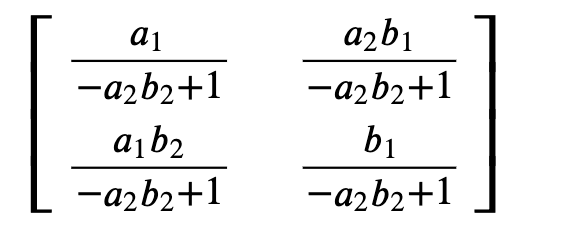

In [15]:
a1, a2, b1, b2 = sp.symbols("a1 a2 b1 b2")

sp.solve([a1/(-a2*b2+1)-9.351965, a2*b1/(-a2*b2+1)-50.843833, a1*b2/(-a2*b2+1)-0.509990, b1/(-a2*b2+1)-4.720662])

[{a1: 3.85912387058425,
  b1: 1.94799910063393,
  b2: 0.0545329243640240,
  a2: 10.7704879103821}]

### 4. Интерпретеация модели

$\begin{cases} LKOH_t = 3,859 t + 10,77 RNFT_t + u_t \\ RNFT_t = 1,948 USD_t + 0,054 LKOH_t + v_t \end{cases} $

#### 4.1 КМНК

In [16]:
y_pred = 3.85912387058425*df['t'] + 10.7704879103821*df['rnft']

rmse = np.sqrt(mean_squared_error(df['lkoh'], y_pred))
mape = mean_absolute_percentage_error(df['lkoh'], y_pred)*100

print(f"Первое уравнение: RMSE = {rmse:.3f}, MAPE = {mape:.3f}")

Первое уравнение: RMSE = 256.359, MAPE = 3.397


In [17]:
y_pred = 1.94799910063393*df['usd'] + 0.0545329243640240*df['lkoh']

rmse = np.sqrt(mean_squared_error(df['rnft'], y_pred))
mape = mean_absolute_percentage_error(df['rnft'], y_pred)*100

print(f"Второе уравнение: RMSE = {rmse:.3f}, MAPE = {mape:.3f}")

Второе уравнение: RMSE = 19.822, MAPE = 3.161


#### 4.2 3МНК

In [18]:
from linearmodels.system.model import IV3SLS

equations = {
    'eq1': {'dependent': df['lkoh'], 'exog': df[['rnft', 't']]},
    'eq2': {'dependent': df['rnft'], 'exog': df[['usd', 'lkoh']]}
}

system = IV3SLS(equations)
result = system.fit(method='gls')

print(result)

                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.9980
No. Equations.:                     2   McElroy's R-squared:                 0.9956
No. Observations:                 359   Judge's (OLS) R-squared:             0.9564
Date:                Wed, Jun 12 2024   Berndt's R-squared:                  0.9936
Time:                        11:37:27   Dhrymes's R-squared:                 0.9980
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                   Equation: eq1, Dependent Variable: lkoh                    
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
rnft           11.274     0.0569     198.22     0.0000      11.162      11.385
t           

### 5. Прогнозы для тестовой выборки

Код для графика:

In [19]:
def plot_pred(ax, df_full, df_true, df_pred, title: str):
    plt.figure(figsize=(10, 5))
    plt.plot(ax, df_full, label='Фактическая стоимость')
    plt.plot(ax[-len(df_pred):], df_pred, label='Предсказанная стоимость', linestyle='--', color='r')
    plt.title(title)
    plt.xlabel('Дни')
    plt.ylabel('Цена закрытия, руб.')
    plt.legend()
    plt.show()

#### 5.1 КМНК

In [20]:
X = df.drop(['lkoh','rnft'], axis=1)
y1 = df['lkoh']
y2 = df['rnft']


X_train = X.iloc[:-30]
X_test = X.iloc[-30:]

y1_train = y1.iloc[:-30]
y1_test = y1.iloc[-30:]

y2_train = y2.iloc[:-30]
y2_test = y2.iloc[-30:]


In [21]:
y1_pred = model1.predict(X_test)
y2_pred = model2.predict(X_test)

mape1 = mean_absolute_percentage_error(y1_pred, y1_test)*100
rmse1 = np.sqrt(mean_squared_error(y1_pred, y1_test))
r2_1 = r2_score(y1_pred, y1_test)*100
mape2 = mean_absolute_percentage_error(y2_pred, y2_test)*100
rmse2 = np.sqrt(mean_squared_error(y2_pred, y2_test))
r2_2 = r2_score(y2_pred, y2_test)*100

print(f"Результат тестовой выборки для первого уравнения: RMSE = {rmse1:.3f}, MAPE = {mape1:.3f}")
print(f"Результат тестовой выборки для первого уравнения: R2 = {r2_1:.3f}")
print(f"Результат тестовой выборки для второго уравнения: RMSE = {rmse2:.3f}, MAPE = {mape2:.3f}")
print(f"Результат тестовой выборки для второго уравнения: R2 = {r2_2:.3f}")

Результат тестовой выборки для первого уравнения: RMSE = 193.585, MAPE = 1.982
Результат тестовой выборки для первого уравнения: R2 = -3115.970
Результат тестовой выборки для второго уравнения: RMSE = 24.764, MAPE = 3.828
Результат тестовой выборки для второго уравнения: R2 = -7488.695


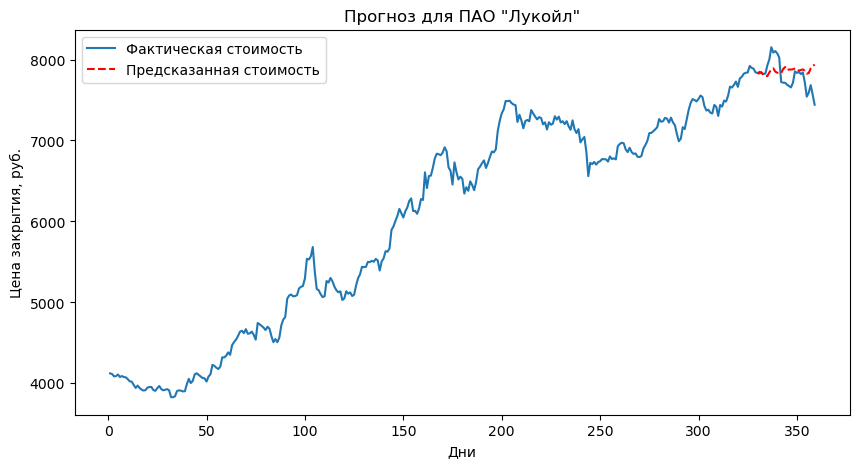

In [147]:
plot_pred(df['t'], df['lkoh'], y1_test, y1_pred, 'Прогноз для ПАО "Лукойл"')

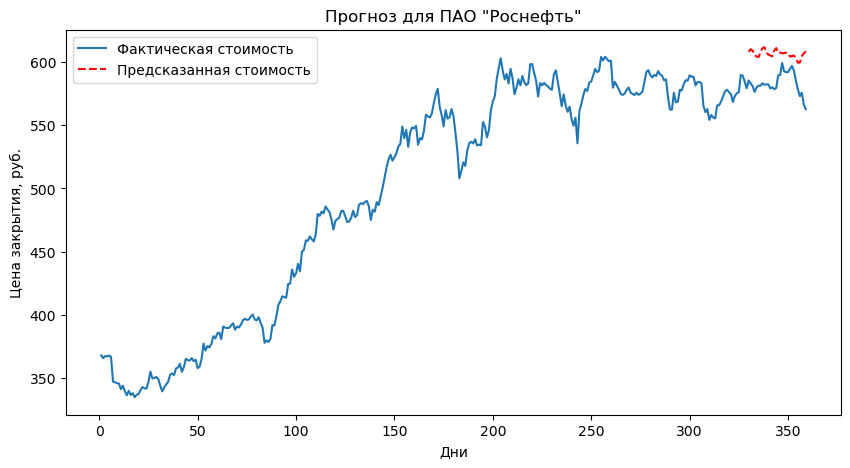

In [148]:
plot_pred(df['t'], df['rnft'], y2_test, y2_pred, 'Прогноз для ПАО "Роснефть"')

#### 5.2 3МНК

In [162]:
size = 30
dftrain = df.iloc[:-size]
dftest = df.iloc[-size:]

equations = {
    'eq1': {'dependent': dftrain['lkoh'], 'exog': dftrain[['rnft', 't']]},
    'eq2': {'dependent': dftrain['rnft'], 'exog': dftrain[['usd', 'lkoh']]}
}

system = IV3SLS(equations)
result = system.fit(method='gls')
equations = {
    'eq1': {'dependent': dftest['lkoh'], 'exog': dftest[['rnft', 't']]},
    'eq2': {'dependent': dftest['rnft'], 'exog': dftest[['usd', 'lkoh']]}
}


y_pred = result.predict(equations)

mape1 = mean_absolute_percentage_error(y_pred['eq1'], dftest['lkoh'])*100
rmse1 = np.sqrt(mean_squared_error(y_pred['eq1'], dftest['lkoh']))
mape2 = mean_absolute_percentage_error(y_pred['eq2'], dftest['rnft'])*100
rmse2 = np.sqrt(mean_squared_error(y_pred['eq2'], dftest['rnft']))

print(f"Результат тестовой выборки для первого уравнения: RMSE = {rmse1:.3f}, MAPE = {mape1:.3f}")
print(f"Результат тестовой выборки для второго уравнения: RMSE = {rmse2:.3f}, MAPE = {mape2:.3f}")

Результат тестовой выборки для первого уравнения: RMSE = 512.431, MAPE = 6.543
Результат тестовой выборки для второго уравнения: RMSE = 44.376, MAPE = 6.740


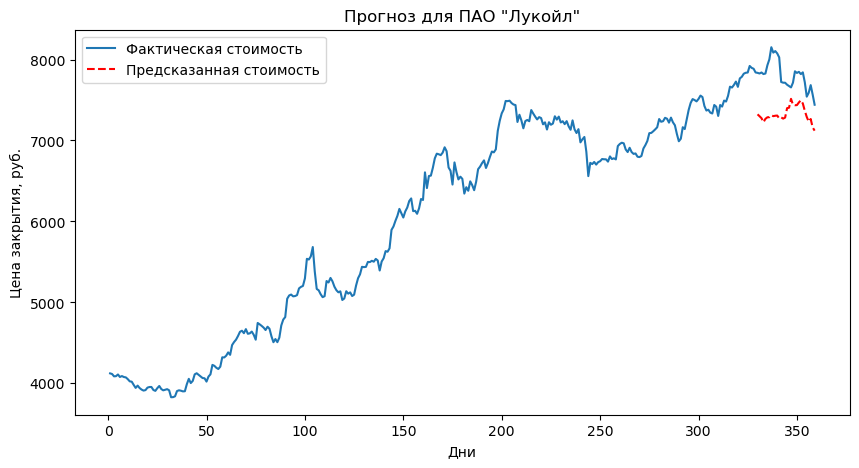

In [163]:
plot_pred(df['t'], df['lkoh'], dftest['lkoh'], y_pred['eq1'], 'Прогноз для ПАО "Лукойл"')

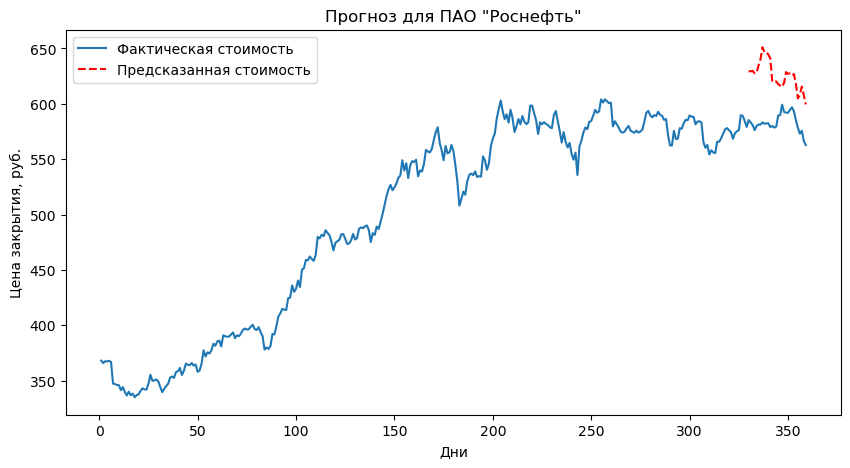

In [164]:
plot_pred(df['t'], df['rnft'], dftest['rnft'], y_pred['eq2'], 'Прогноз для ПАО "Роснефть"')

### 6. Экономическая трактовка результатов

В результате имплементации метода КМНК для нахождения изначальных структурных коэффициентов системы появилась возможность моделировать предсказание стоимости акций компаний Лукойл и Роснефти соответственно на основании следующих факторов, перечисленных ниже:

1. Для Лукойл:
- в зависимости от стоимости акций похожей по структуре и месту компании – Роснефти
- на основе собственныйх уровней временного ряда

2. Для Роснефть:
- в зависимости от обменного курса USD/RUB
- в зависимости от стоимости акций Лукойл

Стоит отметить, что стоимость акций Лукойл так же зависит от обменного курса USD/RUB, эта зависимость учтена через систему.

Экономическая интерпретация: для компаний-экспортеров наиболее выгодной является ситуация, когда обменный курс USD/RUB высокий (то есть, "слабый рубль"/"сильный доллар"), так как основная выручка таких компаний формируется в иностранной валюте, а издержки остаются в рублях.

### 7. Рекомендации по применению модели

На тестовой выборке модель для первого уравнения (прогноз стоимости акций Лукойл) оказалась немного более точной, чем модель для второго уравнения. Таким образом, стоит отдать предпочтение в использовании первого уравнения с возможностью в дальнейшем интерпретировать результаты прогноза на вторую модель.